In [9]:
import matplotlib.pyplot as plt
import numpy as np
import gudhi
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [11]:
# !pip install gudhi

Begin with defining functions for generating and plotting the circles


In [148]:
def generate_noisy_circle(n=200, radius=1, center=(0, 0), noise_std=0.1):
    theta = np.random.uniform(0.0, 2.0 * np.pi, size=n)
    ux = np.cos(theta)
    uy = np.sin(theta)
    cx, cy = center
    base = np.column_stack([cx + radius * ux, cy + radius * uy])
    noise = np.random.rand(n,2)
    points = base + noise_std*radius*noise
    return points

def generate_nested_noisy_circles(n=200, radius_in=1, radius_out=2, center=(0, 0), noise_std=0.1):
    points_1, points_2 =  generate_noisy_circle(n=200, radius = radius_in, center=(0, 0), noise_std=noise_std), generate_noisy_circle(n=200,radius=radius_out, center=(0, 0), noise_std=noise_std)
    return np.vstack([points_1, points_2])
    
def generate_disjoint_noisy_circles(n=200, radius=1, center_1=(0, 0), center_2=(4,0), noise_std=0.1):
    points_1, points_2 =  generate_noisy_circle(n=200, radius=1,center=center_1, noise_std=0.1), generate_noisy_circle(n=200, radius=1,center=center_2, noise_std=0.1)
    return np.vstack([points_1, points_2])

def generate_adjacent_noisy_circles(n=200, radius=1, center_1=(0, 0), center_2=(2,0), noise_std=0.1):
    points_1, points_2 = generate_noisy_circle(n=200, radius=1, center=center_1, noise_std=0.1), generate_noisy_circle(n=200, radius=1, center=center_2, noise_std=0.1)
    return np.vstack([points_1, points_2])

In [152]:
# def plot_noisy_circles(points_1, points_2, title="Noisy Circle"):
#     plt.figure(figsize=(6, 6))
#     plt.scatter(points_1[:, 0], points_1[:, 1], s=30, c="#1f77b4")
#     plt.scatter(points_2[:, 0], points_2[:, 1], s=30, c="#1f77b4")
#     plt.gca().set_aspect("equal", "box")
#     plt.grid(True, linestyle="--", alpha=0.3)
#     plt.title(title)
#     plt.tight_layout()
#     plt.show()
    
def plot_noisy_circle(points,title="Noisy Circle"):
    plt.figure(figsize=(6, 6))
    plt.scatter(points[:, 0], points[:, 1], s=30, c="#1f77b4")
    plt.gca().set_aspect("equal", "box")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.title(title)
    plt.tight_layout()
    plt.savefig("too_noisy.png")
    plt.show()

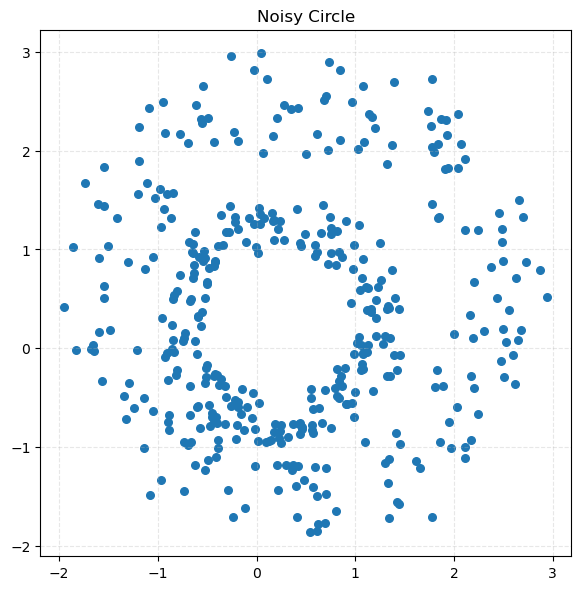

In [154]:
points = generate_nested_noisy_circles(n=200, radius_in=1, radius_out=2, center=(0, 0), noise_std=0.5)
plot_noisy_circle(points)

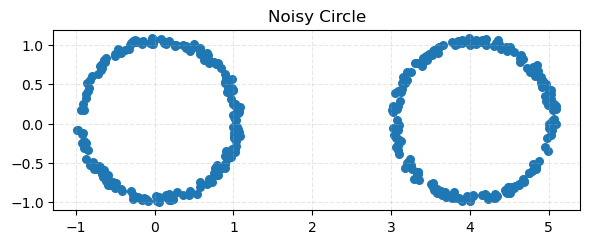

In [140]:
points = generate_disjoint_noisy_circles(noise_std=0.5)
plot_noisy_circle(points)

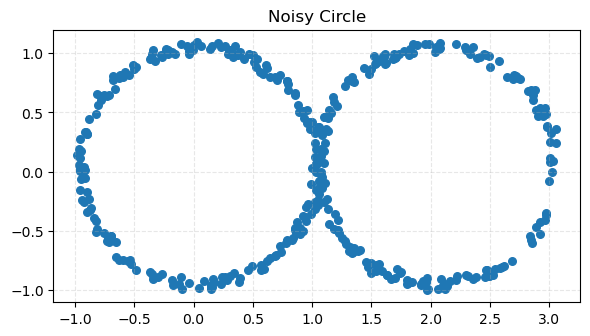

In [134]:
points = generate_adjacent_noisy_circles()
plot_noisy_circle(points)

## Question i\)


In [92]:
sample_size = 4
data = []
for i in range(sample_size):
    points = generate_nested_noisy_circles()
    data.append(points)
    points = generate_disjoint_noisy_circles()
    data.append(points)
    points = generate_adjacent_noisy_circles()
    data.append(points)

## Question ii)

Following this notebook
https://github.com/GUDHI/TDA-tutorial/blob/master/Tuto-GUDHI-representations.ipynb
and this article 
https://medium.com/@a.cervantes2012/interpreting-and-validating-clustering-results-with-k-means-e98227183a4d

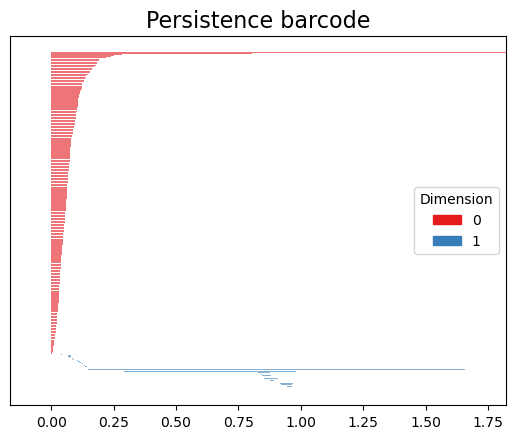

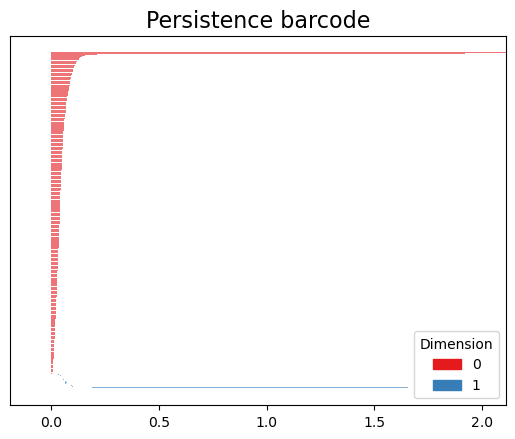

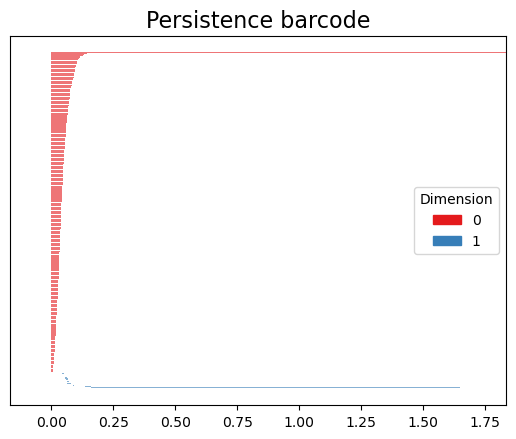

In [158]:
for i in range(0, 3):
    rips_complex = gudhi.RipsComplex(points = data[i])
    st = rips_complex.create_simplex_tree(max_dimension=2)
    PH = st.persistence()
    gudhi.plot_persistence_barcode(PH, legend=True)
    plt.savefig("q_ii_nested_barcode.png")
    plt.show()

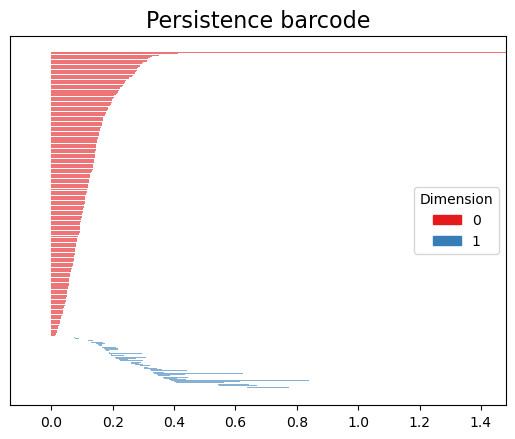

In [156]:
rips_complex = gudhi.RipsComplex(points = points)
st = rips_complex.create_simplex_tree(max_dimension=2)
PH = st.persistence()
gudhi.plot_persistence_barcode(PH, legend=True)
plt.savefig("q_iii_noisy_barcode.png")
plt.show()

## Brice's attempt

In [142]:
def persistence_diagrams(points):
    rips = gudhi.RipsComplex(points=points)
    st = rips.create_simplex_tree(max_dimension=2)
    st.persistence()
    
    H0 = st.persistence_intervals_in_dimension(0)
    H1 = st.persistence_intervals_in_dimension(1)
    return H0, H1

In [144]:
from gudhi.representations import PersistenceImage

PI = PersistenceImage(bandwidth=0.05, weight=lambda bd: bd[1] - bd[0], resolution=[20, 20])


In [146]:
def fit_my_data(data):
    features = []
    for points in data:
        _, H1 = persistence_diagrams(points)
        vec = PI.fit_transform([H1])[0]
        features.append(vec)
    
    X = np.array(features)   # shape (300, d)
    kmeans = KMeans(n_clusters=3, random_state = 0)
    clusters = kmeans.fit_predict(X)
    return X, clusters
X, labels = fit_my_data(data)
X, labels

(array([[-2.27349288e+01, -5.32253212e+01, -7.85401076e+01, ...,
          1.16186721e-39,  8.62489179e-46,  2.38852365e-52],
        [-5.41050586e+01, -5.95622085e+01, -6.41050752e+01, ...,
          1.62554878e+02,  1.63188211e+02,  1.59658630e+02],
        [-6.08965518e+01, -6.48251372e+01, -6.79399946e+01, ...,
          1.67083045e+02,  1.68340868e+02,  1.66368194e+02],
        [-4.70759832e+01, -6.38755624e+01, -4.41206059e+01, ...,
          9.64014051e-39,  8.99250768e-45,  3.16007416e-51],
        [-4.99762321e+01, -5.37409416e+01, -5.69346695e+01, ...,
          1.68413259e+02,  1.69153060e+02,  1.67128533e+02],
        [-5.78778123e+01, -6.83121660e+01, -7.77850307e+01, ...,
          1.16505040e+02,  1.08514150e+02,  9.77559302e+01]]),
 array([2, 1, 1, 0, 1, 1]))

In [9]:
from sklearn.decomposition import PCA
def pca_vis(persistent_homology, clusters):
    """
    INPUT: persistent_homology -> numpy array
           clusters ->  numpy array (1,d) kmeans fitted data
    """
    pca = PCA(n_components=2)
    PH_2d = pca.fit_transform(persistent_homology)
    
    
    plt.figure(figsize=(6, 6))
    plt.scatter(
        PH_2d[:, 0],
        PH_2d[:, 1],
        c=clusters,
        cmap="tab10",
        s=40
    )
    
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.title("K-means clustering using PH summary statistics")
    plt.colorbar(label="Cluster")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('cluster.png') 
    plt.show()
    
# pca_vis(X,labels)

## Zihan's code
This is preferred, as the clustering looks much nicer!

In [169]:
def generate_two_disjoint_concentric_noisy_circle(n=200, radius1=1,radius2=2, center=(0, 0), noise_std=0.1):
    theta = np.random.uniform(0.0, 2.0 * np.pi, size=100)
    ux = np.cos(theta)
    uy = np.sin(theta)
    cx, cy = center
    base = np.column_stack([cx + radius1 * ux, cy + radius1 * uy])
    noise = np.random.rand(100,2)
    points1 = base + noise_std*radius1*noise
    theta = np.random.uniform(0.0, 2.0 * np.pi, size=100)
    ux = np.cos(theta)
    uy = np.sin(theta)
    cx, cy = center
    base = np.column_stack([cx + radius2 * ux, cy + radius2 * uy])
    noise = np.random.rand(100, 2)
    points2 = base + noise_std * radius1 * noise
    points = np.vstack([points1, points2])
    return points
    
def generate_two_disjoint_noisy_circle(n=200,radius=1, center1=(0,0), center2=(3,0), noise_std=0.1):
    theta = np.random.uniform(0.0, 2.0 * np.pi, size=100)
    ux = np.cos(theta)
    uy = np.sin(theta)
    cx1, cy1 = center1
    base = np.column_stack([cx1 + radius * ux, cy1 + radius * uy])
    noise = np.random.rand(100, 2)
    points1 = base + noise_std * radius * noise
    theta = np.random.uniform(0.0, 2.0 * np.pi, size=100)
    ux = np.cos(theta)
    uy = np.sin(theta)
    cx2, cy2 = center2
    base = np.column_stack([cx2 + radius * ux, cy2 + radius * uy])
    noise = np.random.rand(100, 2)
    points2 = base + noise_std * radius * noise
    points = np.vstack([points1, points2])
    return points

def generate_two_adjacent_noisy_circle(n=200,radius=1, center1=(0,0), center2=(2,0), noise_std=0.1):
    theta = np.random.uniform(0.0, 2.0 * np.pi, size=100)
    ux = np.cos(theta)
    uy = np.sin(theta)
    cx1, cy1 = center1
    base = np.column_stack([cx1 + radius * ux, cy1 + radius * uy])
    noise = np.random.rand(100, 2)
    points1 = base + noise_std * radius * noise
    theta = np.random.uniform(0.0, 2.0 * np.pi, size=100)
    ux = np.cos(theta)
    uy = np.sin(theta)
    cx2, cy2 = center2
    base = np.column_stack([cx2 + radius * ux, cy2 + radius * uy])
    noise = np.random.rand(100, 2)
    points2 = base + noise_std * radius * noise
    points = np.vstack([points1, points2])
    return points
    
dataset = []
for i in range(0,3):
    for j in range(0,100):
        if i == 0:
            pc = generate_two_disjoint_concentric_noisy_circle(noise_std=0.5)
        elif i == 1:
            pc = generate_two_disjoint_noisy_circle(noise_std=0.5)
        else:
            pc = generate_two_adjacent_noisy_circle(noise_std=0.5)
        dataset.append(pc)

In [17]:
def split_dgms(persistence):
    dgm0, dgm1 = [], []
    for dim, (b,d) in persistence:
        if d == float("inf"):
            continue
        if dim == 0:
            dgm0.append([b,d])
        elif dim == 1:
            dgm1.append([b,d])
    return np.array(dgm0), np.array(dgm1)

def diagram_stats(dgm):
    if len(dgm) == 0:
        return np.zeros(4)
    pers = dgm[:,1] - dgm[:,0]
    return np.array([len(pers), pers.mean(), pers.max(), pers.sum()])

def ph(persistence):
    dgm0, dgm1 = split_dgms(persistence)
    v0, v1 = diagram_stats(dgm0), diagram_stats(dgm1)
    return np.concatenate([v0,v1])


def cluster_data(data):
    PH = []
    for points in data:
        rips = gudhi.RipsComplex(points=points)
        st = rips.create_simplex_tree(max_dimension=2)
        PH.append(ph(st.persistence()))
    
    PH = np.array(PH)
    kmeans = KMeans(n_clusters=3, random_state = 0)
    clusters = kmeans.fit_predict(PH)
    return PH, clusters

# PH, clusters = cluster_data(dataset)
# PH, clusters

In [7]:
np.unique(clusters,return_counts=True)

(array([0, 1, 2]), array([133, 100,  67], dtype=int64))

In [11]:
dataset_001 = []
for i in range(0,3):
    for j in range(0,100):
        if i == 0:
            pc = generate_two_disjoint_concentric_noisy_circle(noise_std=0.01)
        elif i == 1:
            pc = generate_two_disjoint_noisy_circle(noise_std=0.01)
        else:
            pc = generate_two_adjacent_noisy_circle(noise_std=0.01)
        dataset_001.append(pc)

In [13]:
PH_001, clusters = cluster_data(dataset)
PH_001, clusters

(array([[1.99000000e+02, 9.55938867e-02, 9.89729554e-01, ...,
         5.25269551e-02, 1.40673372e+00, 2.31118602e+00],
        [1.99000000e+02, 9.43607876e-02, 9.91748701e-01, ...,
         5.24382378e-02, 1.21570773e+00, 2.09752951e+00],
        [1.99000000e+02, 9.54400162e-02, 9.88998053e-01, ...,
         6.39684607e-02, 1.42491933e+00, 2.30286459e+00],
        ...,
        [1.99000000e+02, 5.82467999e-02, 3.11347311e-01, ...,
         1.39460378e+00, 1.41774801e+00, 2.78920757e+00],
        [1.99000000e+02, 5.83520401e-02, 3.07298497e-01, ...,
         1.42605273e+00, 1.45929057e+00, 2.85210546e+00],
        [1.99000000e+02, 5.83692770e-02, 2.98219416e-01, ...,
         9.39783126e-01, 1.41196086e+00, 2.81934938e+00]]),
 array([1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2,
        2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
        1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,

# PCA to visualise kmeans clustering

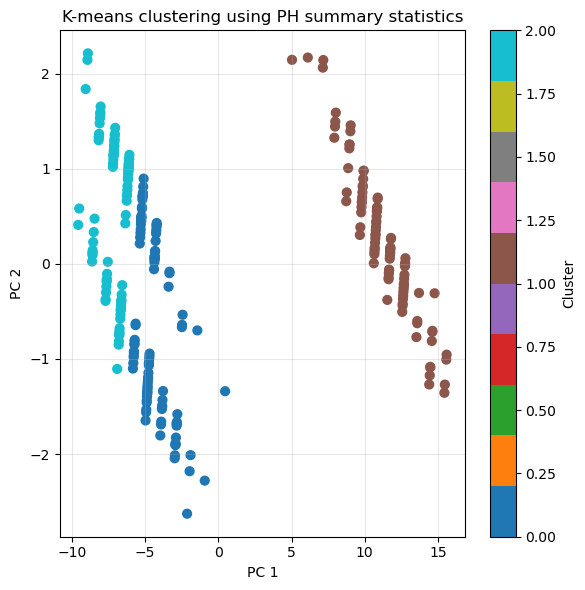

In [11]:
pca_vis(PH,clusters)

Check accuracy

In [162]:
np.unique(clusters,return_counts=True)

(array([0, 1, 2]), array([ 95, 101, 104], dtype=int64))

## Brice attempt \# 2

In [133]:
test_data = []
test_data.append(generate_two_disjoint_concentric_noisy_circle())
test_data.append(generate_two_disjoint_noisy_circle())
test_data.append(generate_two_adjacent_noisy_circle())
test_data.append(generate_two_disjoint_concentric_noisy_circle())
test_data.append(generate_two_disjoint_noisy_circle())
test_data.append(generate_two_adjacent_noisy_circle())
test_data.append(generate_two_disjoint_concentric_noisy_circle())
test_data.append(generate_two_disjoint_noisy_circle())
test_data.append(generate_two_adjacent_noisy_circle())
test_data.append(generate_two_disjoint_concentric_noisy_circle())
test_data.append(generate_two_disjoint_noisy_circle())
test_data.append(generate_two_adjacent_noisy_circle())
PH = []
for points in test_data:
    rips = gudhi.RipsComplex(points=points)
    st = rips.create_simplex_tree(max_dimension=2)
    st.persistence()
    H0 = st.persistence_intervals_in_dimension(0)
    H1 = st.persistence_intervals_in_dimension(1)
    PH.append([H0,H1])
    
    # PH.append(st.persistent_betti_numbers)
# PH




In [101]:
nested_H_0 = 0
nested_H_1 = 0

disjoint_H_0 = 0
disjoint_H_1 = 0

adjacent_H_0 = 0
adjacent_H_1 = 0
# def is_nested_circles(arr):
#     persistence_0, persistence_1 = arr[0], arr[1]
#     if 
classification = []

for persistence_interval_pair in PH:
    nested_H_0 = 0
    nested_H_1 = 0
    
    disjoint_H_0 = 0
    disjoint_H_1 = 0
    
    adjacent_H_0 = 0
    adjacent_H_1 = 0
    persistence_0, persistence_1 = persistence_interval_pair[0], persistence_interval_pair[1]
    persistence_0, persistence_1 = persistence_0[::-1], persistence_1[::-1]
    # print(persistence_0[0:5], persistence_1[0:5])
    # print([persistence_0[1:5][i][1] for i in range(0,4)])
    # print([persistence_1[0:5][i][1] for i in range(0,3)])

    # Check for lots of long lifetime intervals n H_0
    aux = [persistence_0[1:5][i][1] for i in range(0,4)]
    for element in aux:
        if element >= 0.4:
            nested_H_0 += 1

    # Check for lots of intervals in H_1
    if len(persistence_1) >= 10:
        nested_H_1 += 1
    # This characterises nested circles
    # Check for some long lifetime intervals if we haven't determined this is the nested circles
    aux = [persistence_0[1:3][0][1], persistence_0[1:3][1][1]]
    for element in aux:
        if element >= 0.4 and nested_H_0 <=1:
            disjoint_H_0 += 1

    # Check for two intervals in H_1 with lifetimes between 0 and 0.3
    # print(persistence_1[0:3])
    aux = [persistence_1[0:3][i][1] for i in range(len(persistence_1[0:3]))]
    for element in aux:
        if element <= 0.3 and disjoint_H_0 > 0:
            disjoint_H_1 += 1

    # 
    aux = [persistence_0[1:5][i][1] for i in range(len(persistence_0[1:5]))]
    for element in aux:
        if element <= 0.3 and disjoint_H_0 < 1:
            adjacent_H_0 += 1
            # pass
    appended = 0
    if nested_H_0 >= 2 and nested_H_1 >= 1:
        classification.append(0)
        appended += 1
    if disjoint_H_0 >= 1:
        classification.append(1)
        appended += 1
    if adjacent_H_0 >= 3:
        classification.append(2)
        appended += 1
    elif appended == 0:
        classification.append([persistence_0[0:4],persistence_1[0:4],nested_H_0, nested_H_1, disjoint_H_0, disjoint_H_1, adjacent_H_0, adjacent_H_1])
    # classification.append([nested_H_0, nested_H_1, disjoint_H_0, disjoint_H_1, adjacent_H_0, adjacent_H_1])
classification

[0,
 1,
 2,
 0,
 1,
 2,
 0,
 [array([[0.        ,        inf],
         [0.        , 0.96108396],
         [0.        , 0.46437512],
         [0.        , 0.23042133]]),
  array([[0.26717055, 1.67414599],
         [0.5104946 , 1.67397635],
         [1.00260172, 1.00876167],
         [0.08588323, 0.09616022]]),
  2,
  0,
  0,
  0,
  2,
  0],
 2,
 0,
 1,
 1]

In [147]:
# def classify_my_data(data):
#     PH = []
#     for points in data:
#         rips = gudhi.RipsComplex(points=points)
#         st = rips.create_simplex_tree(max_dimension=2)
#         st.persistence()
#         H0 = st.persistence_intervals_in_dimension(0)
#         H1 = st.persistence_intervals_in_dimension(1)
#         PH.append([H0,H1])
    
    # classification = []
    
    # for persistence_interval_pair in PH:
    #     nested_H_0 = 0
    #     nested_H_1 = 0
        
    #     disjoint_H_0 = 0
    #     disjoint_H_1 = 0
        
    #     adjacent_H_0 = 0
    #     adjacent_H_1 = 0
    #     persistence_0, persistence_1 = persistence_interval_pair[0], persistence_interval_pair[1]
    #     persistence_0, persistence_1 = persistence_0[::-1], persistence_1[::-1]
    #     # print(persistence_0[0:5], persistence_1[0:5])
    #     # print([persistence_0[1:5][i][1] for i in range(0,4)])
    #     # print([persistence_1[0:5][i][1] for i in range(0,3)])
    
    #     # Check for lots of long lifetime intervals n H_0
    #     aux = [persistence_0[1:5][i][1] for i in range(0,4)]
    #     for element in aux:
    #         if element >= 0.4:
    #             nested_H_0 += 1
    
    #     # Check for lots of intervals in H_1
    #     if len(persistence_1) >= 10:
    #         nested_H_1 += 1
    #     # This characterises nested circles
        
    #     # Check for some long lifetime intervals if we haven't determined this is the nested circles
    #     aux = [persistence_0[1:3][0][1], persistence_0[1:3][1][1]]
    #     for element in aux:
    #         if element >= 0.4 and nested_H_0 <=1:
    #             disjoint_H_0 += 1
    
    #     # Check for two intervals in H_1 with lifetimes between 0 and 0.3
    #     # print(persistence_1[0:3])
    #     aux = [persistence_1[0:3][i][1] for i in range(len(persistence_1[0:3]))]
    #     for element in aux:
    #         if element <= 0.3 and disjoint_H_0 > 0:
    #             disjoint_H_1 += 1
    
    #     # 
    #     aux = [persistence_0[1:5][i][1] for i in range(len(persistence_0[1:5]))]
    #     for element in aux:
    #         if element <= 0.3 and disjoint_H_0 < 1:
    #             adjacent_H_0 += 1
    #             # pass
        
    #     if nested_H_0 >= 3 and nested_H_1 >= 1:
    #         classification.append(0)
    #     if disjoint_H_0 >= 1:
    #         classification.append(1)
    #     if adjacent_H_0 >= 3:
    #         classification.append(2)

    # return classification
#     classification = []
    
#     for persistence_interval_pair in PH:
    
#         persistence_0, persistence_1 = persistence_interval_pair[0], persistence_interval_pair[1]
#         persistence_0, persistence_1 = persistence_0[::-1], persistence_1[::-1]
#         # print(persistence_0[0:4],persistence_1[0:4])
#         if persistence_0[1][1]>=0.8 and persistence_0[2][1] >= 0.2:
#             if len(persistence_1) >= 10:
#                 classification.append(0)
#             else:
#                 classification.append(1)
#         if persistence_0[1][1]<=0.5: 
#             classification.append(2)
#     return classification

# result = classify_my_data(dataset)
# result

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [149]:
np.unique(result,return_counts=True)

(array([0, 1, 2]), array([101,  99, 100], dtype=int64))

In [171]:
def classify_my_data(data):
    PH = []
    classification = []
    for points in data:
        rips = gudhi.RipsComplex(points=points)
        st = rips.create_simplex_tree(max_dimension=2)
        st.persistence()
        H0 = st.persistence_intervals_in_dimension(0)
        H1 = st.persistence_intervals_in_dimension(1)
        PH.append([H0,H1])
        
    for persistence_interval_pair in PH:
        persistence_0, persistence_1 = persistence_interval_pair[0], persistence_interval_pair[1]
        persistence_0, persistence_1 = persistence_0[::-1], persistence_1[::-1]
        if persistence_0[1][1]>=0.8 and persistence_0[2][1] >= 0.2:
            if len(persistence_1) >= 12:
                classification.append(0)
            else:
                classification.append(1)
        if persistence_0[1][1]<=0.5: 
            classification.append(2)
    return classification

result = classify_my_data(dataset)
np.unique(result,return_counts=True)

(array([0, 2]), array([  1, 116], dtype=int64))

In [135]:
classification = []

for persistence_interval_pair in PH:

    persistence_0, persistence_1 = persistence_interval_pair[0], persistence_interval_pair[1]
    persistence_0, persistence_1 = persistence_0[::-1], persistence_1[::-1]
    # print(persistence_0[0:4],persistence_1[0:4])
    if persistence_0[1][1]>=0.8 and persistence_0[2][1] >= 0.2:
        if len(persistence_1) >= 10:
            classification.append(0)
        else:
            classification.append(1)
    if persistence_0[1][1]<=0.5: 
        classification.append(2)


classification

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]

In [168]:
np.unique(clusters,return_counts=True)

(array([0, 1, 2]), array([119,  96,  85], dtype=int64))

## Question iii)
First observe what the PCA plot looks like with increased noise_std when generating our point clouds 

In [265]:
sample_size = 100
noisier_data = []
for i in range(sample_size):
    points_1, points_2 = generate_nested_noisy_circles(noise_std=0.5)
    noisier_data.append(points_1+points_2)
    points_1, points_2 = generate_disjoint_noisy_circles(noise_std=0.5)
    noisier_data.append(points_1+points_2)
    points_1, points_2 = generate_adjacent_noisy_circles(noise_std=0.5)
    noisier_data.append(points_1+points_2)

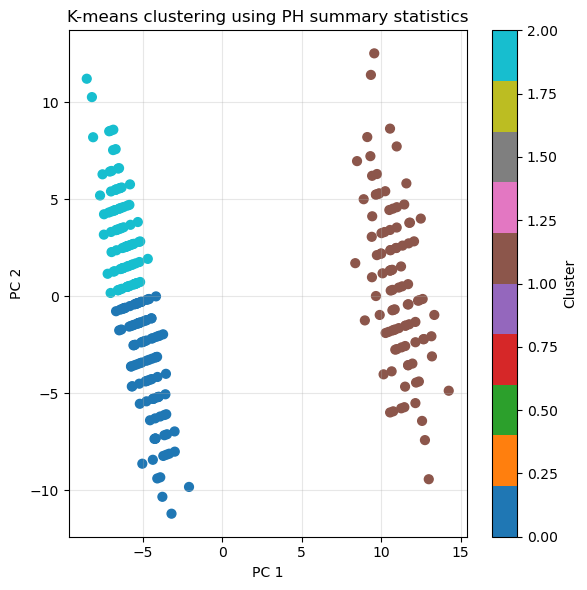

In [269]:
noisier_PH, noisier_clusters = cluster_data(noisier_data)
pca_vis(noisier_PH,noisier_clusters)

In [275]:
np.unique(noisier_clusters, return_counts=True)

(array([0, 1, 2]), array([107, 100,  93], dtype=int64))

So we fail to classify some nested circles and adjacent circles. 

## Question iv)

In [160]:
def generate_random_points(n=10, xlim=(-1.0, 1.0), ylim=(-1.0, 1.0)):
    x = np.random.uniform(xlim[0], xlim[1], size=n)
    y = np.random.uniform(ylim[0], ylim[1], size=n)
    return np.column_stack([x, y])

def add_outliers(points, n_outliers=20, box_size=1.0):
    outliers = np.random.uniform(low=-box_size, high=box_size, size=(n_outliers, 2))
    return np.vstack([points, outliers])

def plot_noisy_circle(points, title="Noisy Circle"):
    plt.figure(figsize=(6, 6))
    plt.scatter(points[:, 0], points[:, 1], s=30, c="#1f77b4")
    plt.gca().set_aspect("equal", "box")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.title(title)
    plt.tight_layout()
    plt.show()

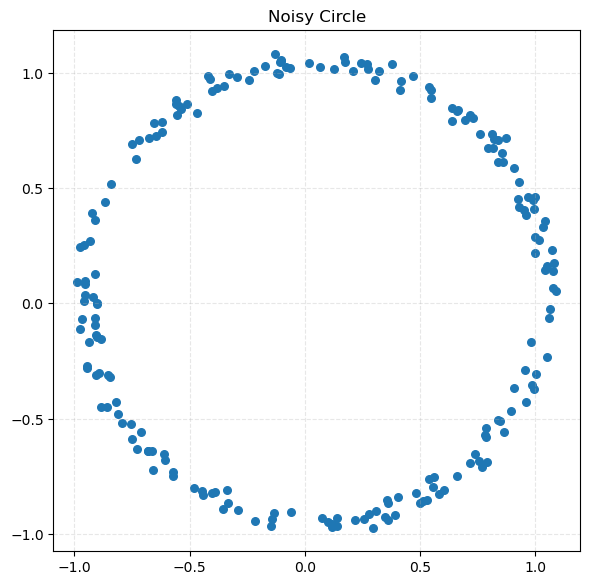

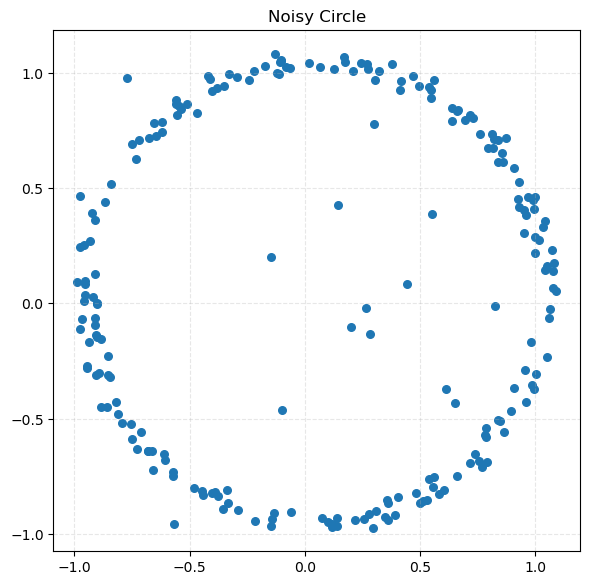

(None, None)

In [162]:
P1 = generate_noisy_circle()
P2 = add_outliers(P1)
plot_noisy_circle(P1), plot_noisy_circle(P2)

In [164]:
def compute_persistence(points):
    rips = gudhi.RipsComplex(points=points)
    st = rips.create_simplex_tree(max_dimension=2)
    st.persistence()
    return st.persistence()

PH1 = compute_persistence(P1)
PH2 = compute_persistence(P2)

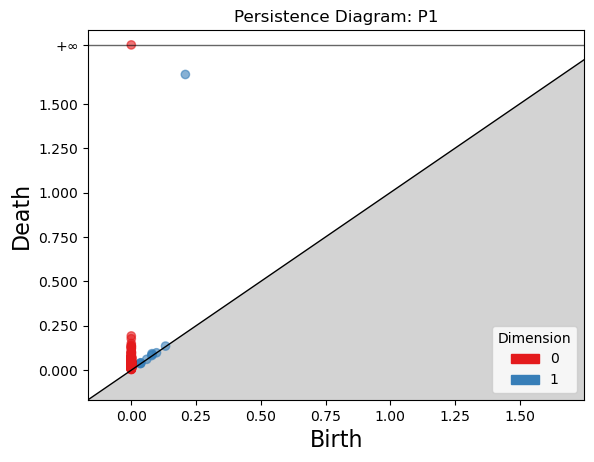

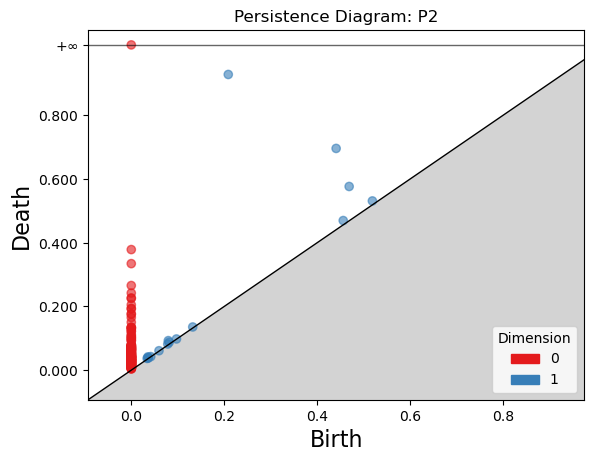

In [188]:
gudhi.plot_persistence_diagram(PH1)
plt.title("Persistence Diagram: P1")
plt.show()

gudhi.plot_persistence_diagram(PH2)
plt.title("Persistence Diagram: P2")
plt.show()


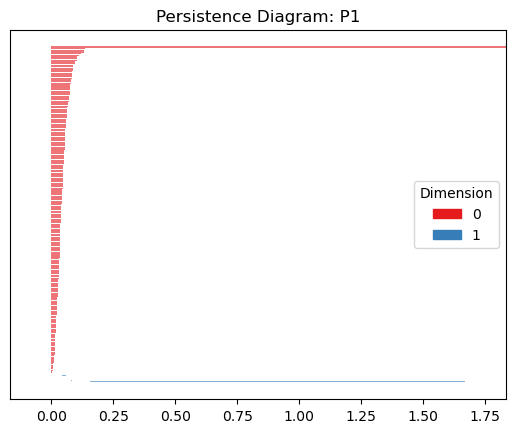

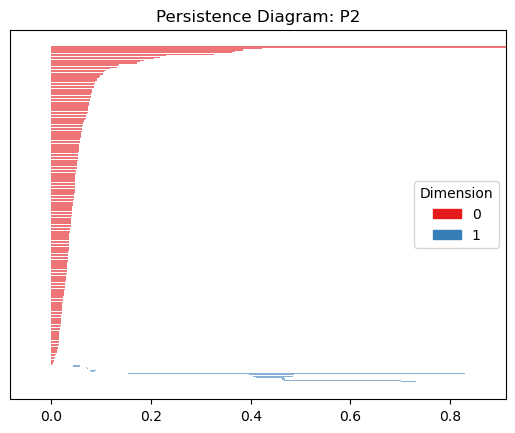

In [168]:
gudhi.plot_persistence_barcode(PH1)
plt.title("Persistence Diagram: P1")
plt.savefig("q_iv_P1.png")
plt.show()

gudhi.plot_persistence_barcode(PH2)
plt.title("Persistence Diagram: P2")
plt.savefig("q_iv_P2.png")
plt.show()

## Misc

In [16]:
def noisy_circle(center, radius, n_points=100, noise=0.05):
    angles = np.random.uniform(0, 2*np.pi, n_points)
    x = center[0] + radius * np.cos(angles)
    y = center[1] + radius * np.sin(angles)
    points = np.vstack([x, y]).T
    points += noise * np.random.randn(n_points, 2)
    return points

def concentric_pair():
    c = np.array([0.0, 0.0])
    c1 = noisy_circle(c, 1.0)
    c2 = noisy_circle(c, 2.0)
    return np.vstack([c1, c2])

def disjoint_pair():
    c1 = noisy_circle((-3, 0), 1.0)
    c2 = noisy_circle(( 3, 0), 1.0)
    return np.vstack([c1, c2])

def adjacent_pair():
    c1 = noisy_circle((-1.2, 0), 1.0)
    c2 = noisy_circle(( 1.2, 0), 1.0)
    return np.vstack([c1, c2])

X = []
labels = []

for _ in range(100):
    X.append(concentric_pair())
    labels.append(0)

for _ in range(100):
    X.append(disjoint_pair())
    labels.append(1)

for _ in range(100):
    X.append(adjacent_pair())
    labels.append(2)

X = np.array(X, dtype=object)
labels = np.array(labels)

In [18]:
def compute_persistence(point_cloud, max_edge_length=3.0):
    rips = gudhi.RipsComplex(points=point_cloud, max_edge_length=max_edge_length)
    st = rips.create_simplex_tree(max_dimension=2)
    st.compute_persistence()
    return st

In [20]:
simplex_trees = [compute_persistence(pc) for pc in X]

In [22]:
H1_diagrams = []

for st in simplex_trees:
    diag = st.persistence_intervals_in_dimension(1)
    H1_diagrams.append(diag)

In [24]:
from gudhi.representations import Landscape

landscape = Landscape(num_landscapes=5,resolution=100)

X_features = landscape.fit_transform(H1_diagrams)


In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_features)


In [28]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(labels, clusters)
print("Adjusted Rand Index:", ari)


Adjusted Rand Index: 0.5057575043156811


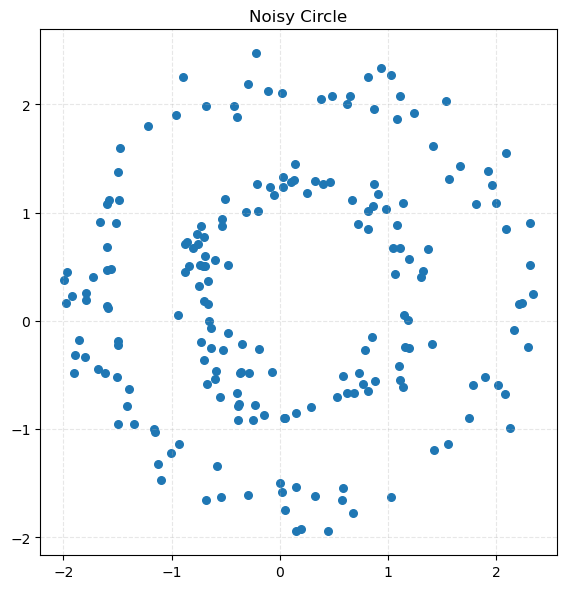

In [142]:
points = generate_two_disjoint_concentric_noisy_circle(n=200, radius1=1,radius2=2, center=(0, 0), noise_std=0.5)
plot_noisy_circle(points)

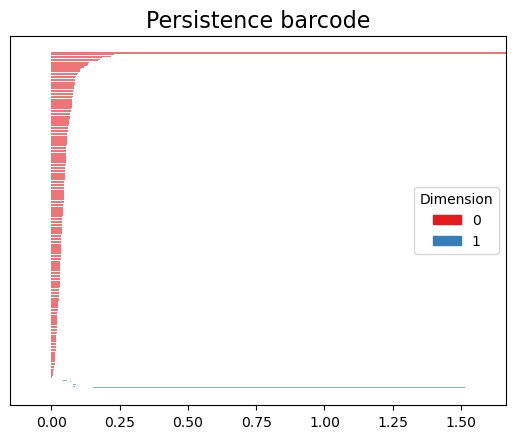

In [178]:
from scipy.spatial.distance import cdist
# def generate_random_points(n=20, xlim=(-1.0, 1.0), ylim=(-1.0, 1.0)):
#     x = np.random.uniform(xlim[0],xlim[1],size=n)
#     y = np.random.uniform(xlim[0],xlim[1],size=n)
#     return np.column_stack([x, y])

# def generate_noisy_circle(n=200, radius=1, center=(0, 0), noise_std=0.1):
#     theta = np.random.uniform(0.0, 2.0 * np.pi, size=n)
#     ux = np.cos(theta)
#     uy = np.sin(theta)
#     cx, cy = center
#     base = np.column_stack([cx + radius * ux, cy + radius * uy])
#     noise = np.random.rand(n,2)
#     points = base + noise_std*radius*noise
#     return points

# P1 = generate_noisy_circle()
# P2 = np.vstack((P1, generate_random_points()))
# rips_complex = gudhi.RipsComplex(points=P1)
# st = rips_complex.create_simplex_tree(max_dimension=2)
# a = st.persistence()
# gudhi.plot_persistence_barcode(a, legend=True)
# plt.show()
# rips_complex = gudhi.RipsComplex(points=P2)
# st = rips_complex.create_simplex_tree(max_dimension=2)
# a = st.persistence()
# gudhi.plot_persistence_barcode(a, legend=True)
# plt.show()

D = cdist(P2, P2)
neighbors = (D < 0.3).sum(axis=1)
clean = neighbors > 5
P2_clean = P2[clean]
rips_complex = gudhi.RipsComplex(points=P2_clean)
st = rips_complex.create_simplex_tree(max_dimension=2)
a = st.persistence()
gudhi.plot_persistence_barcode(a, legend=True)
plt.savefig("q_v_P2_clean.png")
plt.show()